<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/ECG-Smartdevices/blob/main/ECG%26SmartDevices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sadmansakib7/ecg-arrhythmia-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 125M/125M [00:03<00:00, 43.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sadmansakib7/ecg-arrhythmia-classification-dataset/versions/1


In [2]:
import os

print(os.listdir(path))


['MIT-BIH Supraventricular Arrhythmia Database.csv', 'Sudden Cardiac Death Holter Database.csv', 'INCART 2-lead Arrhythmia Database.csv', 'MIT-BIH Arrhythmia Database.csv']


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# Step 1: Load the dataset
dataset_path = path + '/MIT-BIH Arrhythmia Database.csv'

# Load the dataset into a pandas dataframe
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset to check its structure
print("Dataset Preview:")
print(data.head())

# Step 2: Preprocess the data
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

X = data.drop(['record', 'type'], axis=1)  # Features
y = data['type']  # Target variable (type)



Dataset Preview:
   record type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak   0_sPeak  \
0     101    N        76      313.0  0.074347 -0.160548  1.036401 -0.285662   
1     101    N       313      315.0 -0.052079 -0.264784  0.886597 -0.366298   
2     101    N       315      321.0 -0.062151 -0.296983  0.991859 -0.410306   
3     101    N       321      336.0 -0.063322 -0.281386  1.034903 -0.403880   
4     101    N       336      344.0 -0.062915  1.046914  1.046408  1.046408   

    0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  1_pq_interval  \
0 -0.026824              41  ...  0.025930               2             18   
1 -0.059710              21  ... -0.042009              26             27   
2 -0.065686              22  ...  0.009528               3              8   
3 -0.071750              22  ... -0.020536               6              9   
4 -0.074639              11  ...  0.016053              16              5   

   1_qt_interval  1_st_interval  1_qrs_morph0

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install imbalanced-learn


Classification Report:
               precision    recall  f1-score   support

           F       0.86      0.85      0.86       150
           N       1.00      0.99      0.99     18029
           Q       0.00      0.00      0.00         1
        SVEB       0.89      0.93      0.91       582
         VEB       0.95      0.98      0.97      1376

    accuracy                           0.99     20138
   macro avg       0.74      0.75      0.74     20138
weighted avg       0.99      0.99      0.99     20138

Confusion Matrix:
 [[  127     9     0     0    14]
 [   15 17892     1    65    56]
 [    0     1     0     0     0]
 [    0    39     0   541     2]
 [    5    14     0     3  1354]]

Confusion Matrix:
 [[  127     9     0     0    14]
 [   15 17892     1    65    56]
 [    0     1     0     0     0]
 [    0    39     0   541     2]
 [    5    14     0     3  1354]]


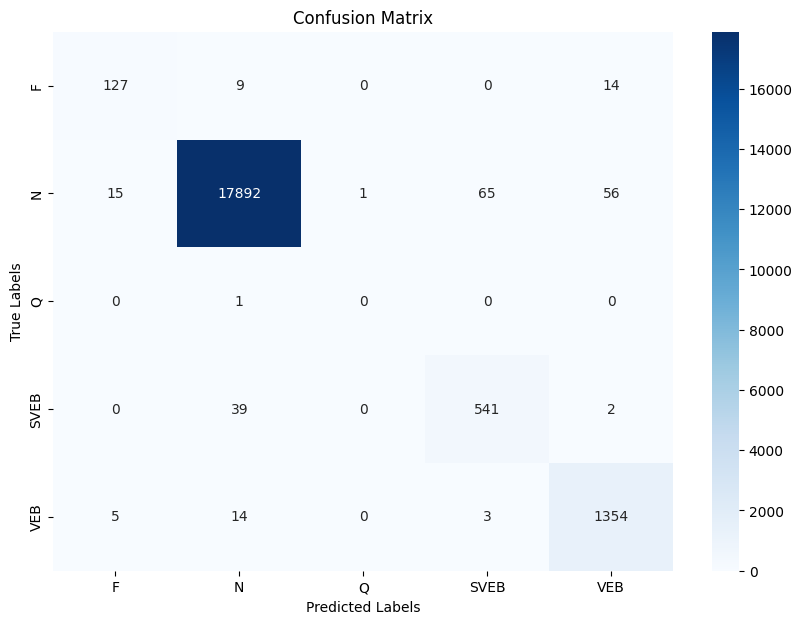

Model Accuracy: 0.9889


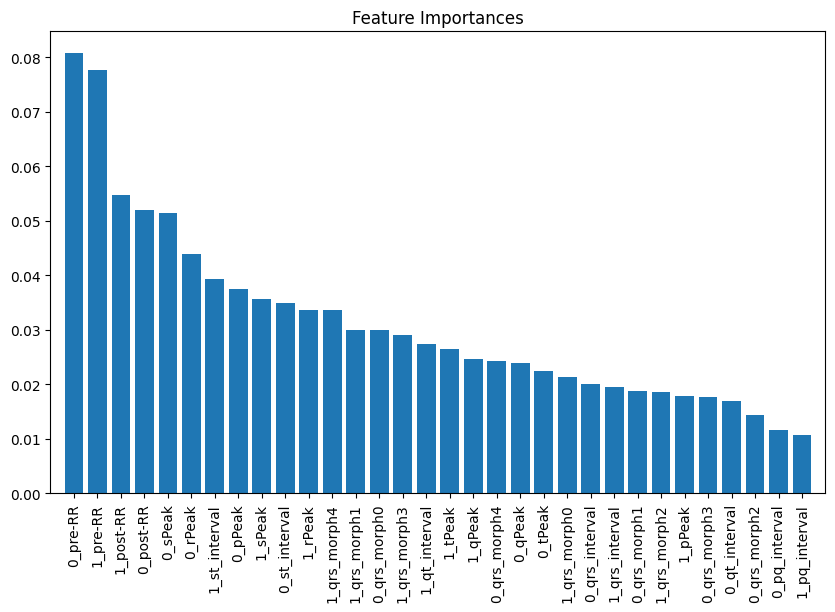

In [22]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the resampled data
rf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model with classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Model accuracy
accuracy = rf_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
